In [1]:
import torch
from torch import nn 

In [2]:
torch.__version__

'2.1.2+cpu'

In [3]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [4]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 1. get data

In [5]:
import requests
import zipfile
from pathlib import Path
data_path=Path("data/")
image_path=data_path/"pizza_steak_sushi"
if image_path.is_dir():
    print(f"{image_path} is exist, skipping download")
else:
    print(f"{image_path} is not exist, please download")
    image_path.mkdir(parents=True,exist_ok=True)
    with open(image_path/"pizza_steak_sushi.zip","wb") as f:
        request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        f.write(request.content)
    with zipfile.ZipFile(image_path / "pizza_steak_sushi.zip","r") as zip_ref:
        zip_ref.extractall(image_path)

data/pizza_steak_sushi is not exist, please download


### 2 data preparing

In [6]:
import os
def walk_through(dir_path):
    for dirpath,dirname,filenames in os.walk(dir_path):
        print(dirname,len(dirname),len(filenames),dirpath)
walk_through(image_path)

['train', 'test'] 2 1 data/pizza_steak_sushi
['sushi', 'pizza', 'steak'] 3 0 data/pizza_steak_sushi/train
[] 0 72 data/pizza_steak_sushi/train/sushi
[] 0 78 data/pizza_steak_sushi/train/pizza
[] 0 75 data/pizza_steak_sushi/train/steak
['sushi', 'pizza', 'steak'] 3 0 data/pizza_steak_sushi/test
[] 0 31 data/pizza_steak_sushi/test/sushi
[] 0 25 data/pizza_steak_sushi/test/pizza
[] 0 19 data/pizza_steak_sushi/test/steak


In [7]:
# setup testpath and trainpath
train_dir=image_path/"train"
test_dir=image_path/"test"
test_dir

PosixPath('data/pizza_steak_sushi/test')

### 2.1 visulize the image

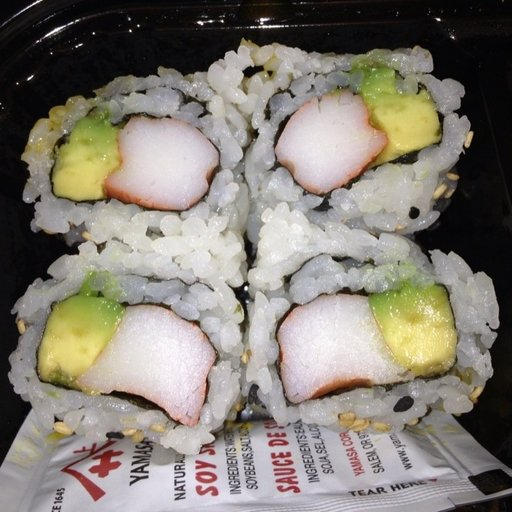

In [8]:
import random
from PIL import Image
# 1. set seed
random.seed(42)
# 2. get all images path
image_path_list=list(image_path.glob("*/*/*.jpg"))
#3 random select a path
random_image_path=random.choice(image_path_list)
random_image_path
# get image from parent path
random_class=random_image_path.parent.stem
random_class
img=Image.open(random_image_path)
img

In [9]:
print(f"random_image_path {random_image_path}")
print(f"class name {random_class}")
print(f"image height {img.height}")
print(f"image width {img.width}")

random_image_path data/pizza_steak_sushi/train/sushi/2980779.jpg
class name sushi
image height 512
image width 512


(512, 512, 3)

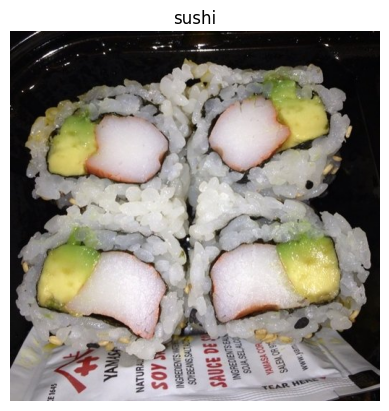

In [10]:
import numpy as np
import matplotlib.pyplot as plt
img_as_array=np.asarray(img)
plt.imshow(img_as_array)
plt.axis("off")
plt.title(random_class)
img_as_array.shape

## 3. transforming data

In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms


### 3.1 transform data with torchvision.transforms

In [12]:
data_transform=transforms.Compose([transforms.Resize(size=(64,64)),
                                 transforms.RandomHorizontalFlip(p=0.5),
                                 transforms.ToTensor()])


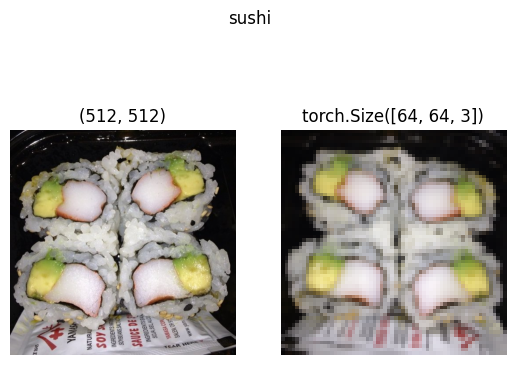

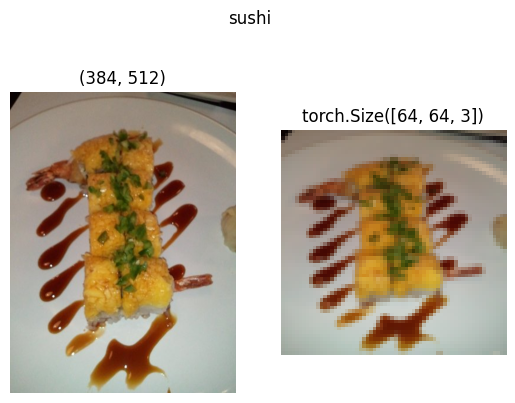

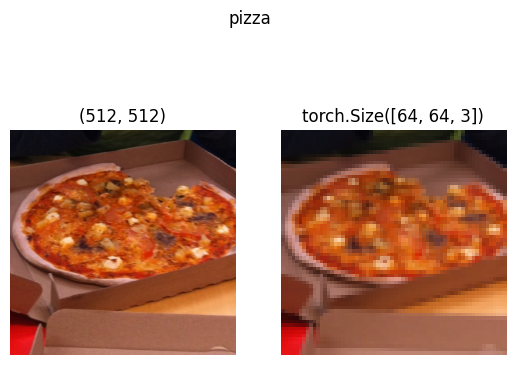

In [13]:
def plot_transformed_image(image_paths,transform,n:int,seed=42):
    random.seed(42)
    random_img_path=random.sample(image_paths,k=n)
    for img_path in random_img_path:
        with Image.open(img_path)  as f:
            fig,ax=plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f.size)
            ax[0].axis(False)
            transformed_image=transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(transformed_image.shape)
            ax[1].axis(False)
            fig.suptitle(img_path.parent.stem)
            
plot_transformed_image(image_paths=image_path_list,transform=data_transform,n=3,seed=42)